In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm  # Corrected import
warnings.filterwarnings('ignore')

In [2]:
# Install pyarrow so pandas can read parquet files via the pyarrow engine
%pip install pyarrow


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_parquet("C:/Users/Lenovo/Downloads/yellow_tripdata_2020-01.parquet", engine="pyarrow")

In [4]:
df.to_csv("yellow_tripdata.csv", index=False)

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None


In [6]:
df.shape

(6405008, 19)

In [7]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [8]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [9]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [10]:
df['Duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'] 
df['Duration']=df['Duration'].dt.total_seconds()/60


In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,None,4.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,None,7.416667
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,None,6.183333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,None,4.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,None,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2,2020-01-31 23:08:00,2020-01-31 23:34:00,NaN,12.07,NaN,None,191,35,0,52.18,2.75,0.5,0.00,0.00,0.3,55.73,NaN,None,26.000000
6405004,2,2020-01-31 23:00:00,2020-01-31 23:44:00,NaN,23.48,NaN,None,186,117,0,54.01,2.75,0.5,0.00,6.12,0.3,63.68,NaN,None,44.000000
6405005,2,2020-01-31 23:13:00,2020-01-31 23:38:00,NaN,12.09,NaN,None,164,131,0,38.02,2.75,0.5,0.00,6.12,0.3,47.69,NaN,None,25.000000
6405006,2,2020-01-31 23:02:54,2020-01-31 23:27:10,NaN,11.65,NaN,None,10,16,0,28.74,2.75,0.0,0.00,0.00,0.3,31.79,NaN,None,24.266667


In [12]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df


,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1,6.00,1.20,4.800000
1,1.0,1,7.00,1.20,7.416667
2,1.0,1,6.00,0.60,6.183333
3,1.0,1,5.50,0.80,4.850000
4,1.0,2,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,0,52.18,12.07,26.000000
6405004,NaN,0,54.01,23.48,44.000000
6405005,NaN,0,38.02,12.09,25.000000
6405006,NaN,0,28.74,11.65,24.266667


In [13]:
# Track data loss for 'fare_amount' at each cleaning step
print('Initial shape:', df.shape)
print('Initial fare_amount nulls:', df["fare_amount"].isnull().sum())
print('Initial fare_amount <= 0:', (df["fare_amount"]<=0).sum())

Initial shape: (6405008, 5)
Initial fare_amount nulls: 0
Initial fare_amount <= 0: 22246


In [14]:
df.isnull().sum()

passenger_count    65441
payment_type           0
fare_amount            0
trip_distance          0
Duration               0
dtype: int64

In [15]:
(65441/len(df))*100

1.021716132126611

In [16]:
df.dropna(inplace = True)

In [17]:
print('After dropna:', df.shape)
print('fare_amount nulls after dropna:', df["fare_amount"].isnull().sum())

After dropna: (6339567, 5)
fare_amount nulls after dropna: 0


In [18]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1,6.0,1.20,4.800000
1,1.0,1,7.0,1.20,7.416667
2,1.0,1,6.0,0.60,6.183333
3,1.0,1,5.5,0.80,4.850000
4,1.0,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1,11.0,2.10,14.233333
6339563,1.0,1,13.0,2.13,19.000000
6339564,1.0,1,12.5,2.55,16.283333
6339565,1.0,2,8.5,1.61,9.633333


In [19]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['passenger_type'] = df['payment_type'].astype('int64')

In [20]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration,passenger_type
2056,1,2,7.0,0.00,0.000000,2
2441,1,1,52.0,0.00,0.200000,1
2446,2,1,9.5,1.70,13.066667,1
2465,1,1,4.0,0.40,3.083333,1
3344,1,1,6.0,1.20,5.350000,1
...,...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000,2
6339559,1,1,8.5,1.81,8.016667,1
6339560,1,2,6.5,0.98,6.900000,2
6339562,1,1,11.0,2.10,14.233333,1


In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df['payment_type'].value_counts(normalize = True) 

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [23]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]


In [24]:
df.shape

(2780283, 6)

In [25]:
df['payment_type'].replace([1,2],['card','cash'],inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration,passenger_type
0,1,card,6.0,1.20,4.800000,1
1,1,card,7.0,1.20,7.416667,1
2,1,card,6.0,0.60,6.183333,1
3,1,card,5.5,0.80,4.850000,1
4,1,cash,3.5,0.00,2.300000,2
...,...,...,...,...,...,...
6339555,3,card,10.0,2.09,14.800000,1
6339561,1,card,17.5,4.11,21.500000,1
6339563,1,card,13.0,2.13,19.000000,1
6339564,1,card,12.5,2.55,16.283333,1


In [26]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration,passenger_type
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01,1.313811e+00
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01,4.640405e-01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03,1.000000e+00
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00,1.000000e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01,1.000000e+00
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01,2.000000e+00
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03,2.000000e+00


In [27]:
#remove negative values
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['Duration']>0]              


In [28]:
print('After removing fare_amount <= 0:', df.shape)
print('fare_amount <= 0 after filter:', (df["fare_amount"]<=0).sum())

After removing fare_amount <= 0: (2748932, 6)
fare_amount <= 0 after filter: 0


In [29]:
#remove outliers
for col in ['fare_amount','trip_distance','Duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
    

In [30]:
print('After outlier removal:', df.shape)

After outlier removal: (2297908, 6)


In [31]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration,passenger_type
0,1,card,6.0,1.20,4.800000,1
1,1,card,7.0,1.20,7.416667,1
2,1,card,6.0,0.60,6.183333,1
3,1,card,5.5,0.80,4.850000,1
5,1,cash,2.5,0.03,0.883333,2
...,...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333,1
6339555,3,card,10.0,2.09,14.800000,1
6339561,1,card,17.5,4.11,21.500000,1
6339563,1,card,13.0,2.13,19.000000,1


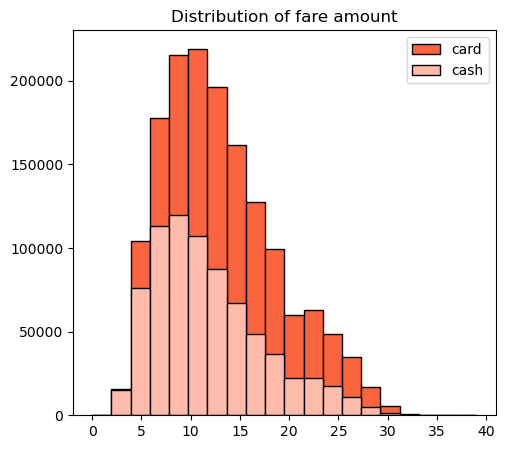

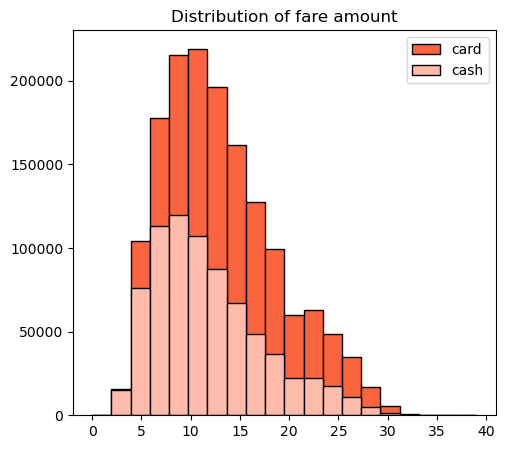

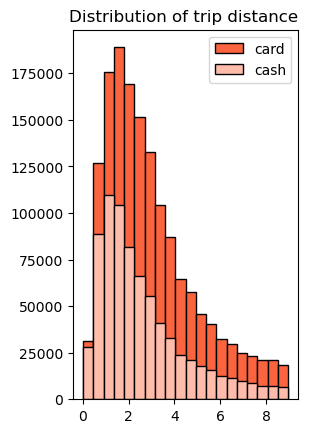

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='card']['fare_amount'], histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'], histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='cash')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance ')
plt.hist(df[df['payment_type']=='card']['trip_distance'], histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'], histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='cash')
plt.legend()
plt.show()


In [33]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

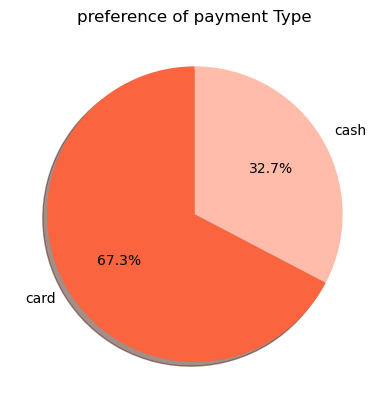

In [34]:
plt.title('preference of payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels = df['payment_type'].value_counts().index,
       startangle=90,shadow = True,autopct = '%1.1f%%', colors =['#FA643F','#FFBCAB'])
plt.show()

In [35]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)


In [36]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

In [37]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


In [38]:
passenger_df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
passenger_df['payment_type'] = ['card','cash']
passenger_df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
passenger_df.iloc[1,1:] = passenger_count.iloc[5:,-1]
passenger_df

,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


<Axes: ylabel='payment_type'>

<Axes: ylabel='payment_type'>

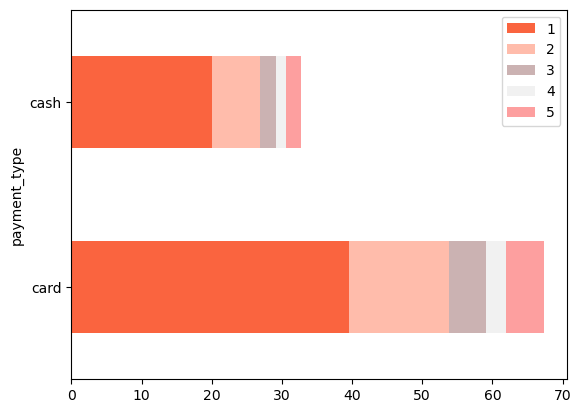

In [39]:
passenger_df.plot(x='payment_type',kind ='barh',stacked= True,color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

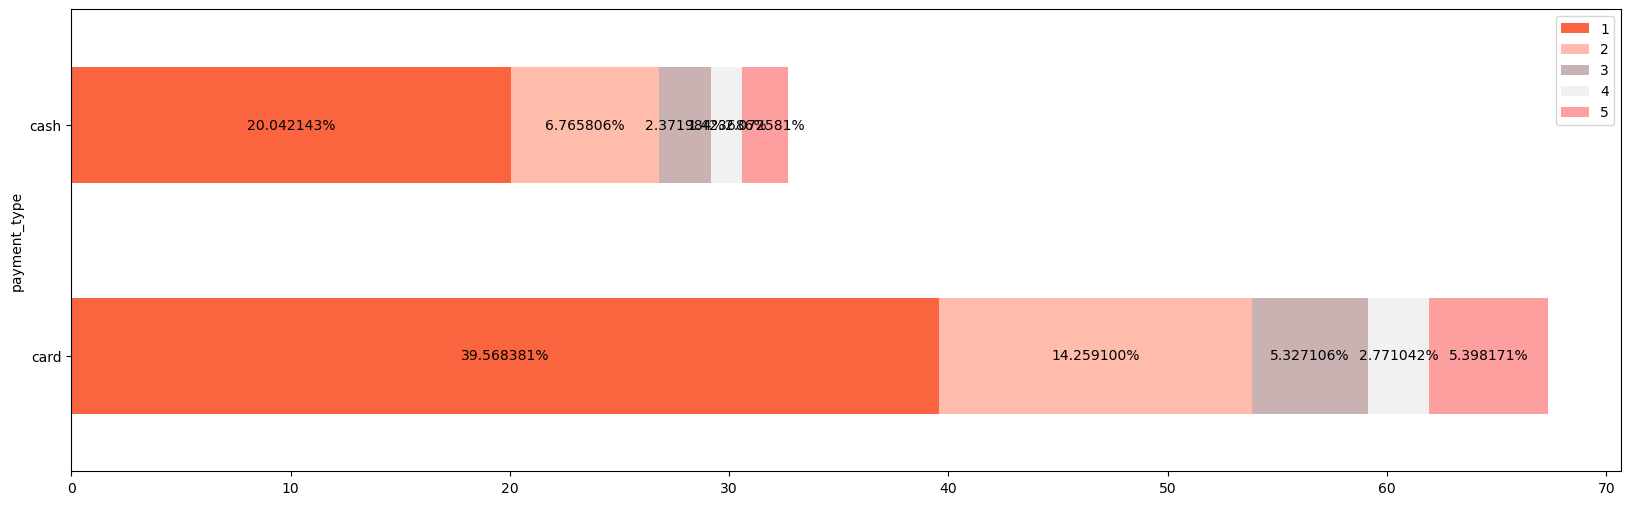

In [40]:
fig, ax = plt.subplots(figsize=(20,6))
passenger_df.plot(x='payment_type', kind ='barh', stacked= True,ax=ax,color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
            '{:0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

In [41]:
print('Original df columns:')
print(df.columns)
print('\nSample of passenger_df:')
print(passenger_df.head())

Original df columns:
Index(['passenger_count', 'payment_type', 'fare_amount', 'trip_distance',
       'Duration', 'passenger_type'],
      dtype='object')

Sample of passenger_df:
  payment_type          1         2         3         4         5
0         card  39.568381   14.2591  5.327106  2.771042  5.398171
1         cash  20.042143  6.765806  2.371984  1.423686  2.072581


In [42]:
card_sample = df[df['payment_type']=='card']['fare_amount']
cash_sample = df[df['payment_type']=='cash']['fare_amount']


In [43]:
t_stats, p_value = st.ttest_ind(a=card_sample,b = cash_sample,equal_var=False)
print('T statistic',t_stats, 'p-value',p_value)


T statistic 169.2111527245052 p-value 0.0
